## Análisis de Componentes Principales
El análisis de componentes principales (PCA) es el proceso mediante el cual se calculan los componentes principales de una matriz de datos con el objeto de realizar una comprensión de los datos. PCA es un enfoque no supervisado, lo que significa que se realiza en un conjunto de variables $X_1, X_2,…, X_d$ sin respuesta asociada $Y$. PCA reduce la dimensionalidad del conjunto de datos, lo que permite explicar la mayor parte de la variabilidad utilizando menos variables. El PCA se usa comúnmente como una primera herramienta de visualización de los datos, para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones.

Sea $X$ una matriz de $n$ datos $d$-dimensionales, con cada componente  de media nula, i.e.

$$X = \begin{pmatrix}
x_{11} &...& x_{1d} \\
&...&\\
x_{n1}&...& x_{nd} \\
\end{pmatrix}
\quad donde \quad \bar{\bf{x}_j}=0, \quad j=1,...,d$$

Buscamos la dirección $w'=(w_1,...,w_d)$ tal que la proyección de $X$ sobre esta dirección maximice la varianza empírica de $Xw$: 

$$\max_w \hat{\sigma}^2(Xw) \quad \text{s. a} \quad \|w\|=1$$

Tenemos que:

$$\hat{\sigma}^2(Xw) =  w'X'Xw  - (\mathbb{E}(Xw))^2= w' \hat{\Sigma} w$$

donde  $\hat{\Sigma}$ es la varianza empírica de $X$:
$$\hat{\Sigma} = X'X = \begin{pmatrix}
\sum_{i=1}^n (x_{i1})^2 &...& \sum_{i=1}^n (x_{i1}x_{id}) \\
&...&\\
\sum_{i=1}^n (x_{id}x_{i1})&...& \sum_{i=1}^n (x_{id})^2  \\
\end{pmatrix}$$

Para maximizar la varianza $\hat{\sigma}^2(Xw)$, construimos el Lagrangiano:

$$L = w' \hat{\Sigma} w + \lambda (w'w-1)$$

La condición de máximo queda:

$$\frac{\partial L}{\partial w} = 2 \hat{\Sigma} w - 2\lambda w = 0 \quad \implies \quad \hat{\Sigma} w = \lambda w$$

Con lo cual $w$ es un vector propio de $\hat{\Sigma}$,  y por lo tanto

$$\hat{\sigma}^2(Xw) = w' \hat{\Sigma} w = w' (\lambda w) = \lambda$$

la dirección de máxima varianza es la dirección asociada al vector propio cuyo valor propio es máximo.
Este procedimiento puede iterarse para obtener la segunda proyección (ortogonal a la primera) de máxima varianza, que será el vector propio correspondiente al segundo mayor valor propio. Y por inducción se pueden obtener las siguientes componentes principales.

In [35]:
# INSTALACIONES REQUERIDAS
#install.packages("corrplot")

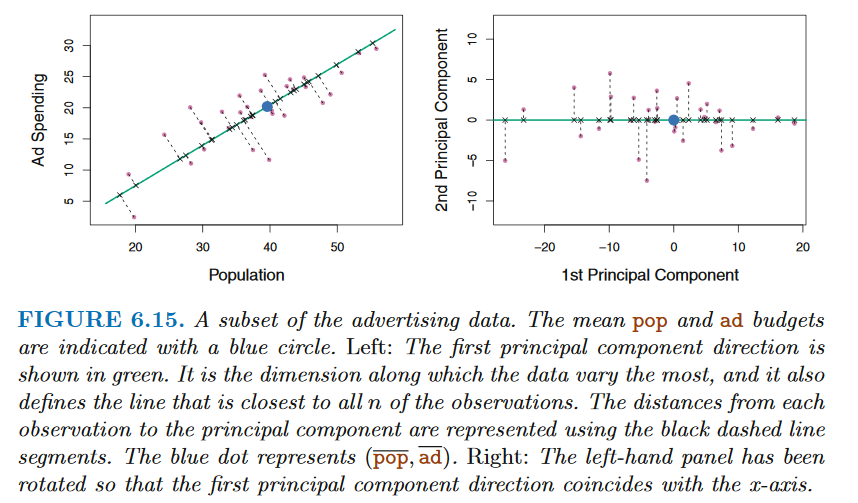

In [36]:
library("IRdisplay")
display_png(file="ejemploPCA.png",width=600)

**Referencias**:
1. Kevin Murphy (2012) "Machine Learning, a probabilistic approach", Capítulo 12. MIT Press
2. Hastie, Tibshirani and Friedman, "The elements of statistical learning" 2nd Ed., Springer, Capítulo 14
3. Ethem Alpayin (2004) "Introduction to Machine Learning", Capítulo 6, MIT Press


#### Ejercicio 1: 
Derive expresiones para demostrar que la segunda dirección (ortogonal a la primera) de máxima varianza, es el vector propio correspondiente al segundo mayor valor propio.

#### Ejemplo Ilustrativo:
Consideremos el conjunto de datos de "USArrests" que está integrado en R. Este es un conjunto de datos que contiene cuatro variables que representan el número de arrestos por cada 100.000 residentes por asalto, asesinato y violación en cada uno de los cincuenta estados de EE. UU. en el año 1973. Los datos  contienen también  el porcentaje de la población que vive en áreas urbanas, UrbanPop. 

In [37]:
data("USArrests")
head(USArrests, 10)


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


#### Preparando los datos
Para desarrollar los algoritmos vistos es preferible que cada variable  se centre en cero y que tengan una escala común. Por ejemplo, la varianza de Asalto es 6945, mientras que la varianza de Asesinato es solo 18.97. Los datos de Asalto no son necesariamente más variables, simplemente están en una escala diferente en relación con el Asesinato.

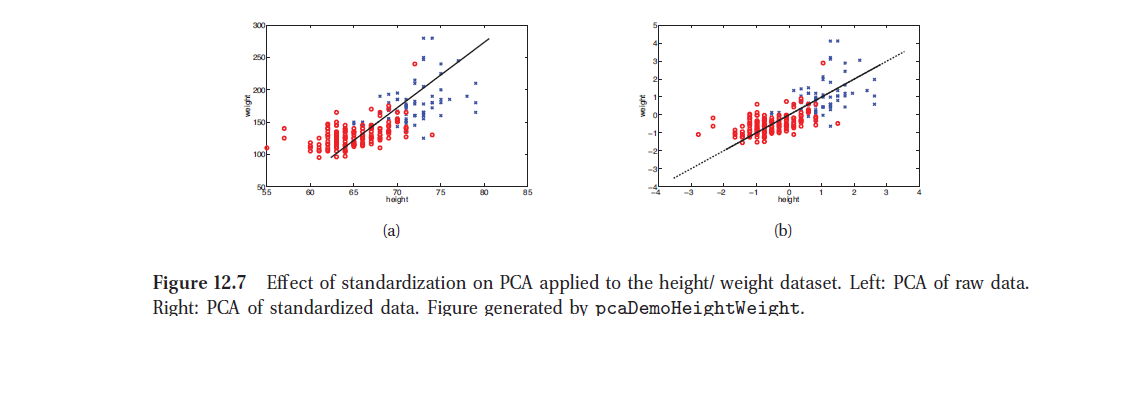

In [38]:
display_png(file="figura2.png")

In [39]:
getRversion()

[1] '3.6.1'

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

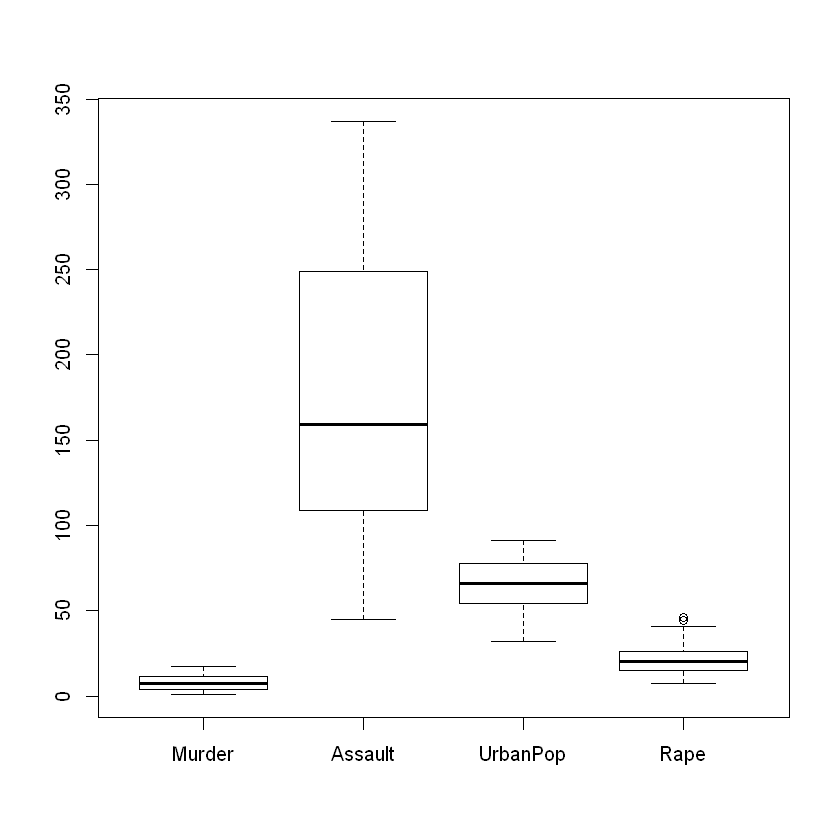

             Murder   Assault   UrbanPop      Rape
Murder   1.00000000 0.8018733 0.06957262 0.5635788
Assault  0.80187331 1.0000000 0.25887170 0.6652412
UrbanPop 0.06957262 0.2588717 1.00000000 0.4113412
Rape     0.56357883 0.6652412 0.41134124 1.0000000


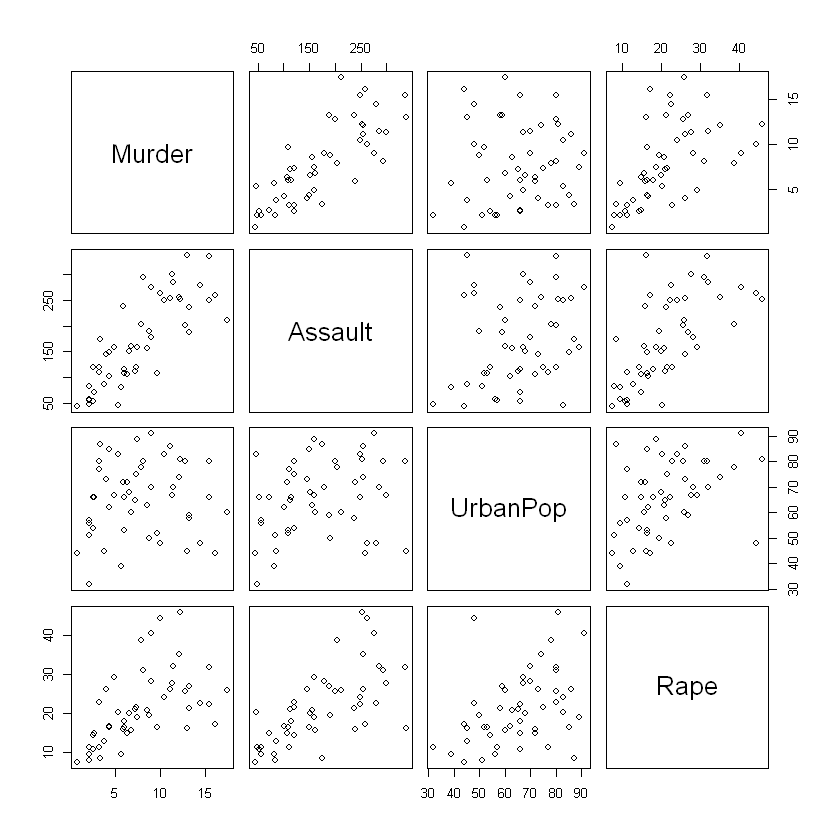

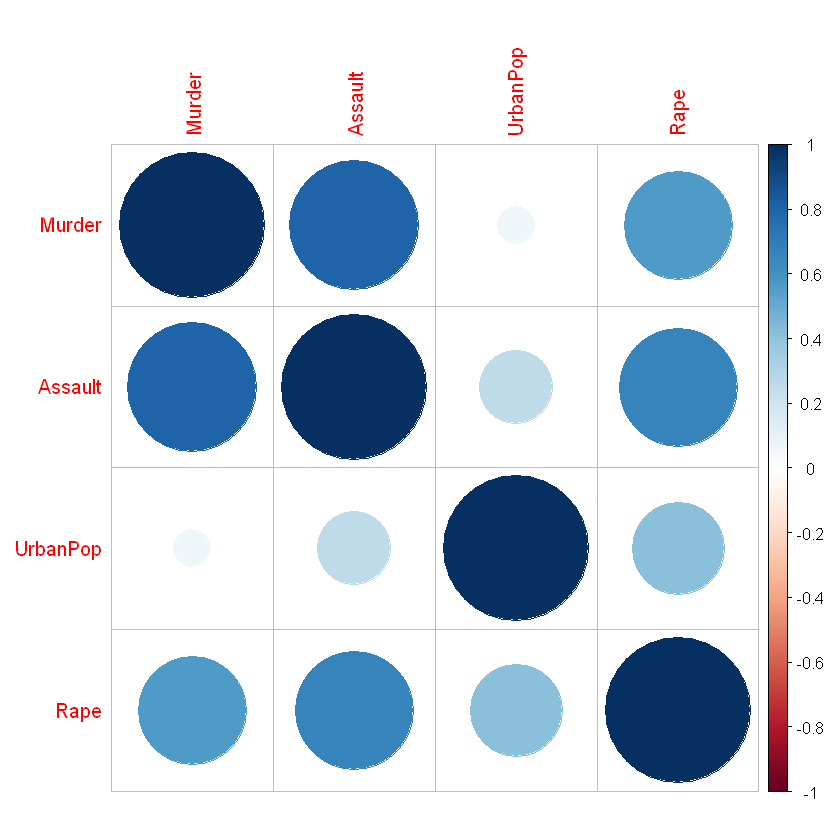

In [40]:
#análisis exploratorio de los datos

library(corrplot)

# cada variable
summary(USArrests)
boxplot(USArrests)

#relaciones entre variables
plot(USArrests)

#Matriz de correlación
mcor<-cor(USArrests)
print(mcor)

corrplot(mcor)



In [41]:
# calcula varianzas para cada variable
# data, row or column, function
apply(USArrests, 2, var) # column, varianza

apply(USArrests,2,mean) # column, promedio


Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Una posibilidad es estandarizar las variables:

In [42]:
# escalando los datos

scaled_df <- apply(USArrests, 2, scale)
head(scaled_df)

apply(scaled_df, 2, var)
apply(scaled_df, 2, mean)

Murder,Assault,UrbanPop,Rape
1.24256408,0.7828393,-0.5209066,-0.003416473
0.50786248,1.1068225,-1.2117642,2.484202941
0.07163341,1.4788032,0.9989801,1.042878388
0.23234938,0.2308680,-1.0735927,-0.184916602
0.27826823,1.2628144,1.7589234,2.067820292
0.02571456,0.3988593,0.8608085,1.864967207


Murder  Assault UrbanPop     Rape 
       1        1        1        1

Murder       Assault      UrbanPop          Rape 
-7.663087e-17  1.112408e-16 -4.332808e-16  8.942391e-17

Sin embargo, no siempre el escalado es  deseable. Un ejemplo sería si cada variable en el conjunto de datos tuviera las mismas unidades y el analista deseara capturar esta diferencia en la varianza para sus resultados. Dado que Asesinato, Asalto y Violación se miden según las ocurrencias por cada 100,000 personas, esto puede ser razonable dependiendo de cómo quiera interpretar los resultados. Pero como UrbanPop se mide como un porcentaje de la población total, no tendría sentido comparar la variabilidad de UrbanPop con el asesinato, el asalto y la violación.

Lo importante a recordar es que el PCA está influenciado por la magnitud de cada variable; por lo tanto, los resultados obtenidos cuando realizamos PCA también dependerán de si las variables se han escalado individualmente.

In [43]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica

#cov() forms the variance-covariance matrix. Only method="pearson" is implemented at this tim

#Siendo scaled_df matriz de varianza emperírica
arrests.cov <- cov(scaled_df)

#Calculamos los valores propios
arrests.eigen <- eigen(arrests.cov)

arrests.eigen


eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
           [,1]       [,2]       [,3]        [,4]
[1,] -0.5358995  0.4181809 -0.3412327  0.64922780
[2,] -0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] -0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] -0.5434321 -0.1673186  0.8177779  0.08902432


In [44]:
# Extrayendo los pesos de los dos primeras componentes principales 
w <- -arrests.eigen$vectors[,1:2]  #Selecciona la columna 1 y 2
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(w) <- c("PC1", "PC2")
w


,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


In [45]:
# Calcula proyección de los datos en cada componente principal
# Coordenadas
PC1 <- as.matrix(scaled_df) %*% w[,1]
PC2 <- as.matrix(scaled_df) %*% w[,2]

# Crea nuevo dataframe con la proyección
PC <- data.frame(State = row.names(USArrests), PC1, PC2)

head(PC)

State,PC1,PC2
Alabama,0.9756604,-1.1220012
Alaska,1.9305379,-1.0624269
Arizona,1.7454429,0.7384595
Arkansas,-0.1399989,-1.1085423
California,2.4986128,1.5274267
Colorado,1.4993407,0.9776297


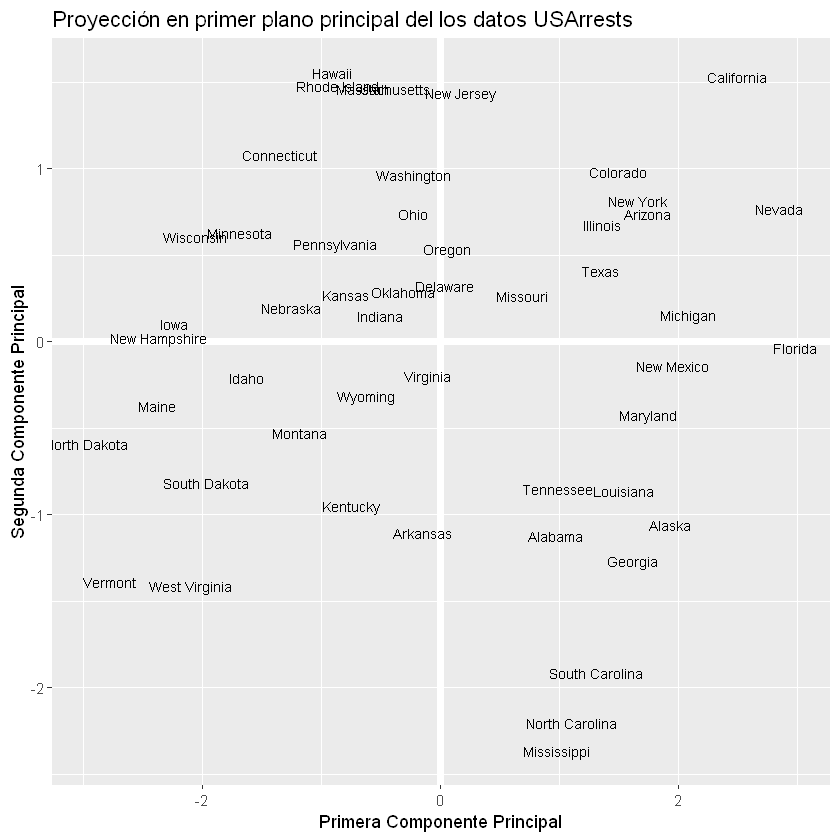

In [46]:
library(ggplot2)
# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

#### Selección del número de componentes principales

Como ya se ha mencionado el PCA reduce la dimensionalidad al mismo tiempo que explica la mayor parte de la variabilidad, pero existe un método más técnico para medir exactamente qué porcentaje de la varianza se mantuvo en estos componentes principales.

La proporción de varianza explicada (PVE) por la m-ésima componente principal se calcula utilizando la ecuación:
$$PVE = \frac{\sum_{i=1}^n \sum_{j=1}^d (w_{jm}x_{ij})^2}{\sum_{i=1}^n \sum_{j=1}^d {x_{ij}}^2}$$

De los cálculos previos se tiene que otra manera de calcular el PVE de la m-ésima componente principal es considerando los valores propios:
$$PVE = \frac{\lambda_m}{\sum_{j=1}^d \lambda_j}$$

In [47]:
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
# Ordenados por ejes
round(PVE, 2)

[1] 0.62 0.25 0.09 0.04

La primera componente principal en el ejemplo explica el 62% de la variabilidad, y la segunda componente principal explica el 25%. Juntas, las dos primeras componentes principales explican el 87% de la variabilidad. 

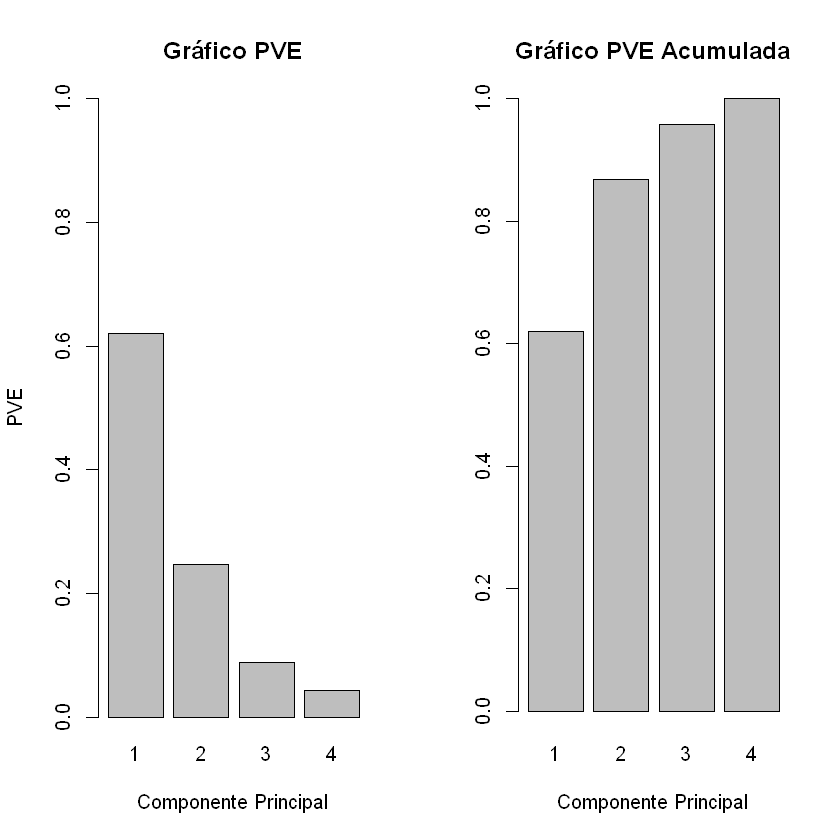

In [48]:

# Gráfico de la PVE
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1), names.arg=c(1:4))
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada", names.arg=c(1:4))


## Ahora con las funciones predefinidas en R

In [49]:
pca_res <- prcomp(USArrests, scale = TRUE)
names(pca_res)
pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x
head(pca_res$x)


[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.5748783 0.9948694 0.5971291 0.4164494

,PC1,PC2,PC3,PC4
Murder,0.5358995,-0.4181809,0.3412327,-0.64922780
Assault,0.5831836,-0.1879856,0.2681484,0.74340748
UrbanPop,0.2781909,0.8728062,0.3780158,-0.13387773
Rape,0.5434321,0.1673186,-0.8177779,-0.08902432


Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

,PC1,PC2,PC3,PC4
Alabama,0.9756604,-1.1220012,0.43980366,-0.154696581
Alaska,1.9305379,-1.0624269,-2.01950027,0.434175454
Arizona,1.7454429,0.7384595,-0.05423025,0.826264240
Arkansas,-0.1399989,-1.1085423,-0.11342217,0.180973554
California,2.4986128,1.5274267,-0.59254100,0.338559240
Colorado,1.4993407,0.9776297,-1.08400162,-0.001450164


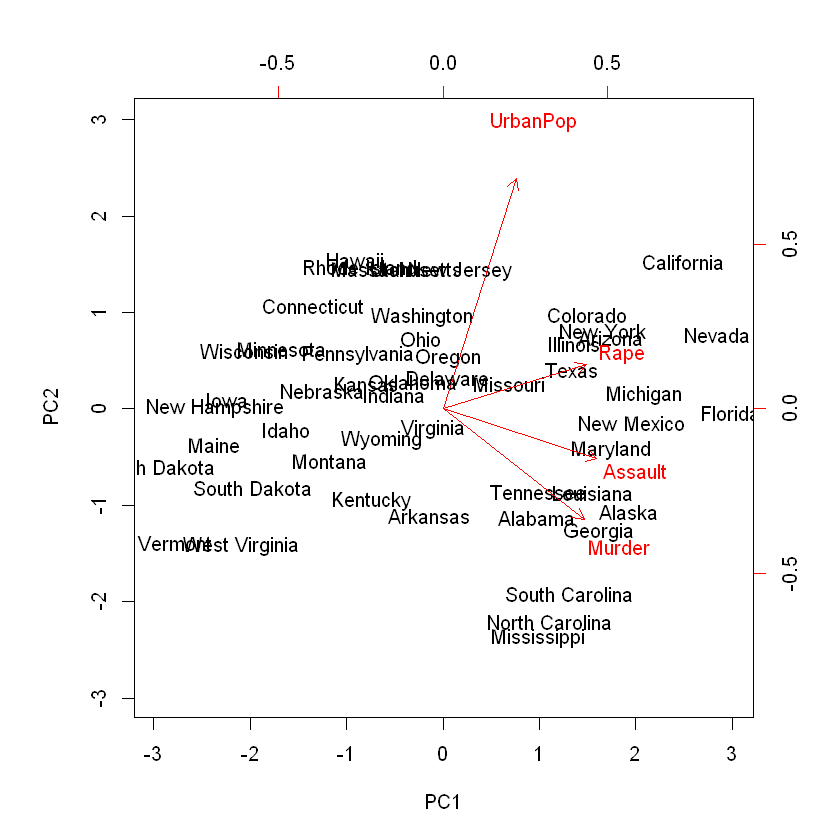

In [50]:
biplot(pca_res, scale = 0)

#### Ejercicio 2:
1. Explique como se relacionan variables y observaciones en este último gráfico. Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos. 
2. Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp. 
3. Utilice la función predefinida en R princomp y compare con prcomp.


In [51]:
#       (1)

# # Relación Variables

# Las variables de Asalto y Asesinato tienen una alta correlación positiva (están cercanos el uno al otro)
# No tanto así con Violaciones que se aleja un poco más de estos

# Considerando lo dicho en clases, un ángulo de cerca de 90 grados o más entre estos vectores vendría indicando una correlación negativa
# Esta correlación negativa se puede observar entre Población Urbana y Asesinatos
# Y Población Urbana vendría teniendo un poco de correlación positiva con los casos de Violaciones

# # Observaciones
# En base al gráfico, considerando que izquierda en general implica menor relación, y derecha mayor relación a algún crimen
# Dakota, Vermon, West Virgina, New Hampshire son ciudades en las que no hay tantos delitos de manera general

# Por el contrario Texas, Illinoi, New York son ciudad con altos indicios de casos de Violación
# En Maryland hay una gran cantidad de Asaltos
# Georgia, Alabama, Tennessei son algunas de las ciudades con altos indicios de casos de Asesinatos
# Michigan y New Mexico tienen indices correlacionados de Violación y Asaltos

# # Cálculo manual VS prcomp

# El resultado es el mismo de manera numérica, pero hay ciertos cambios en las rotaciones,
# Una vez ajustado el sentido de la rotación, los gráficos también son iguales.

In [52]:
#       (2)
#prcomp devuelve sdev, rotation, center, scale y x
#Basicamente muchas variables que se utilizan para PCA
pca_res <- prcomp(USArrests, scale = TRUE)
print("Sub variables pca_res")
names(pca_res)
print("Desviación estandar")
pca_res$sdev # Entrega un vector desviacion estandar relacionada a las componentes principales
pca_res$rotation <- -pca_res$rotation
print("Matriz de Rotación")
pca_res$rotation # Matriz de rotación, las columnas son vectores propios
print("Vector de media por c/ Componente principal")
pca_res$center # Vector de medias de los datos, para centralizarlos solo se usa si scale = TRUE
print("Vector de sdev")
pca_res$scale # Vector desviacion estandar, tiene el largo de columnas, solo se usa si scale = TRUE
pca_res$x <- -pca_res$x
print("Tabla final de datos, actualmente mostrando 5 primeros")
head(pca_res$x) # Son los datos finales con su respectiva relación a PCi, con i cantidad de variables (componentes principales)

[1] "Sub variables pca_res"


[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] "Desviación estandar"


[1] 1.5748783 0.9948694 0.5971291 0.4164494

[1] "Matriz de Rotación"


,PC1,PC2,PC3,PC4
Murder,0.5358995,-0.4181809,0.3412327,-0.64922780
Assault,0.5831836,-0.1879856,0.2681484,0.74340748
UrbanPop,0.2781909,0.8728062,0.3780158,-0.13387773
Rape,0.5434321,0.1673186,-0.8177779,-0.08902432


[1] "Vector de media por c/ Componente principal"


Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

[1] "Vector de sdev"


Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

[1] "Tabla final de datos, actualmente mostrando 5 primeros"


,PC1,PC2,PC3,PC4
Alabama,0.9756604,-1.1220012,0.43980366,-0.154696581
Alaska,1.9305379,-1.0624269,-2.01950027,0.434175454
Arizona,1.7454429,0.7384595,-0.05423025,0.826264240
Arkansas,-0.1399989,-1.1085423,-0.11342217,0.180973554
California,2.4986128,1.5274267,-0.59254100,0.338559240
Colorado,1.4993407,0.9776297,-1.08400162,-0.001450164


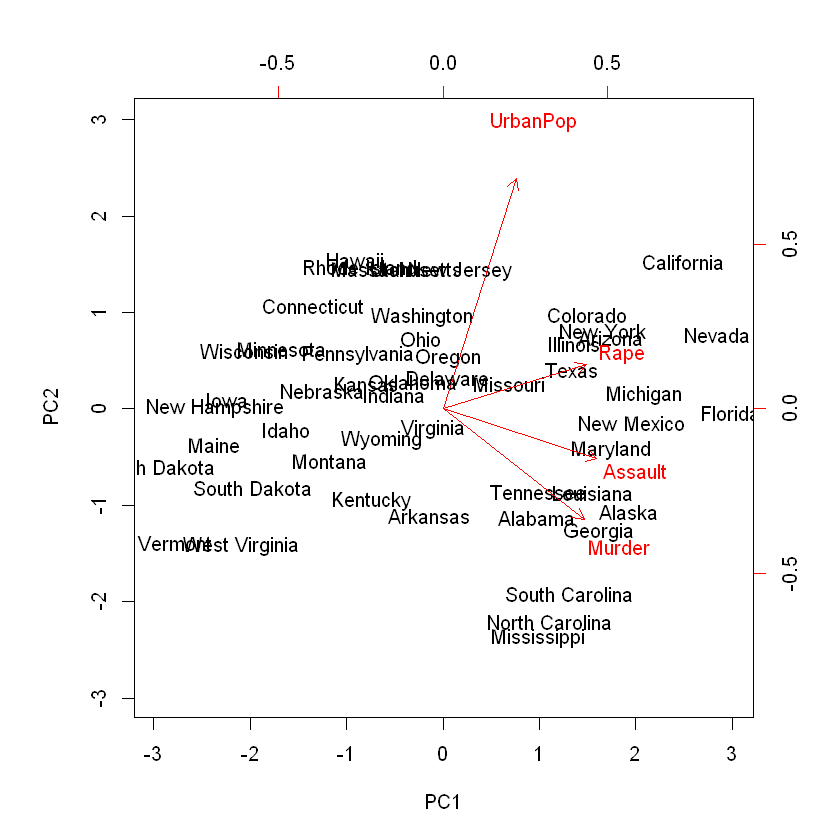

In [53]:
#Variables 90° se dice que son independientes
#Las flechas rojas indican relaciones según la pendiente y grado frente a esta
#e indican hacia que lado hay mayor indice y relación
biplot(pca_res, scale = 0)

In [54]:
#       (3)

# Definición R
#'prcomp' realiza un análisis de componentes principales en la matriz de datos dada 
            #y devuelve los resultados como un objeto de clase 'prcomp'.
#'princomp' realiza un análisis de componentes principales en la matriz de datos numéricos dada
            #y devuelve los resultados como un objeto de clase 'princop'.
            
pca_res <- princomp(USArrests, cor= TRUE)
names(pca_res)
pca_res$sdev # Desviacion estandar componentes principales, no escalado
pca_res$loadings # Matriz con valores propios
pca_res$center # los promedios sacados
pca_res$scale # Escala aplicada a los valores
pca_res$n.obs # Número de observaciones (?)
head(pca_res$scores) # Puntacion individual (frente a las 4 variables) por cada ciudad del dataframe
pca_res$call # info contenida pca_res

# # # # # # # # # # # # # # # # #
# Conclusión respecto a prcomp  #
# # # # # # # # # # # # # # # # #

# En sí entregan la misma información, con una distinción muy pequeña en los valores
# Como diferencia en términos de ejecución (de función) prcomp debe estar "escalado" y princomp con "correlacion", es decir,
# aplican distintas metodologías para llegar a un resultado practicamente igual

[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"

Comp.1    Comp.2    Comp.3    Comp.4 
1.5748783 0.9948694 0.5971291 0.4164494


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.311735 82.500075 14.329285  9.272248

[1] 50

,Comp.1,Comp.2,Comp.3,Comp.4
Alabama,0.9855659,1.1333924,0.44426879,0.156267145
Alaska,1.9501378,1.0732133,-2.04000333,-0.438583440
Arizona,1.7631635,-0.7459568,-0.05478082,-0.834652924
Arkansas,-0.1414203,1.1197968,-0.11457369,-0.182810896
California,2.5239801,-1.5429340,-0.59855680,-0.341996478
Colorado,1.5145629,-0.9875551,-1.09500699,0.001464887


princomp(x = USArrests, cor = TRUE)

In [55]:
# Al graficar (celda siguiente) sin estos ajustes de cambio de signo, quedaría reflejado al eje X
# Con los cambios siguientes, la gráfica de referencia prcomp y princomp son prácticamente iguales
pca_res$loadings[,2] <- -pca_res$loadings[,2]
pca_res$loadings[,4] <- -pca_res$loadings[,4]

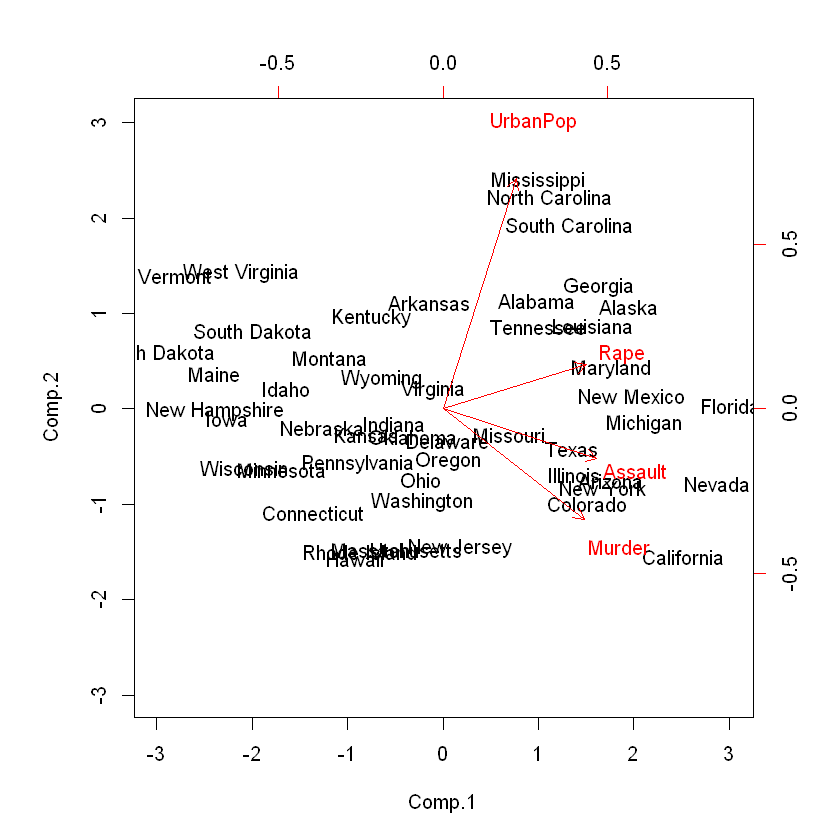

In [56]:
biplot(pca_res, scale = 0)

#### Ejercicio 3: 
Considere los datos socio-económicos y de salud disponibles en el archivo "comunas.csv". Filtre los datos para analizar un grupo específico de comunas (al menos 30): por ejemplo sólo de 3 regiones, en un rango de número de habitantes, etc. 
1. Realice un Análisis de Componentes Principales para estos datos. 
2. Analice e interprete sus resultados

In [57]:
#1
datos <- read.table(file="comunas.csv",row.names = 2,sep=";",dec=".",header= TRUE)
# Cantidad de datos y variables a considerar, en comunas.csv
datosPobMayor100 <- datos[datos[,2] >=100,]
print("Ciudades consideradas en la tabla, con población > 100 000")
rownames(datosPobMayor100)

print("Cantidad de ciudades y cantidad de variables (columnas)")
dim(datosPobMayor100)
print("6 Primeros Datos")
head(datosPobMayor100)

[1] "Ciudades consideradas en la tabla, con población > 100 000"


[1] "Iquique"          "Calama"           "Antofagasta"      "Copiap«"         
 [5] "La Serena"        "Coquimbo"         "Ovalle"           "Quilpu?"         
 [9] "ViØa del Mar"     "Villa Alemana"    "Valparaðso"       "Rancagua"        
[13] "Curic«"           "Talca"            "Chiguayante"      "Concepci«n"      
[17] "Talcahuano"       "Chill\230n"          "Los ‘ngeles"      "Coronel"         
[21] "Temuco"           "Puerto Montt"     "Osorno"           "Punta Arenas"    
[25] "Las Condes"       "Providencia"      "óuØoa"            "Santiago"        
[29] "Lo Barnechea"     "La Florida"       "Maip?"            "Quilicura"       
[33] "Estaci«n Central" "Puente Alto"      "PeØalol?n"        "Pudahuel"        
[37] "Colina"           "Conchalð"         "Recoleta"         "El Bosque"       
[41] "San Bernardo"     "Renca"            "La Granja"        "Melipilla"       
[45] "Cerro Navia"      "La Pintana"       "Valdivia"         "Arica"

[1] "Cantidad de ciudades y cantidad de variables (columnas)"


[1] 48 13

[1] "6 Primeros Datos"


,Regi.n,Poblaci.n..miles..2011,IDSE,Ingreso.per.c.p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aØos..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aØos..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aØos.2011,Mortalidad.Infantil.x.1000.NV.2009.11
Iquique,1,186.0,0.698,227.6,10.2,11.1,81.8,98.8,77.2,0.631,82.1,73.0,8.9
Calama,2,148.8,0.717,269.3,8.5,10.9,85.0,98.9,76.2,0.625,87.2,63.4,9.7
Antofagasta,2,373.0,0.714,256.5,7.1,11.0,80.6,99.0,76.1,0.627,75.1,72.2,7.3
Copiap«,3,163.9,0.671,219.4,14.5,10.7,85.9,97.6,77.7,0.609,69.0,72.6,10.2
La Serena,4,214.7,0.669,194.3,14.5,10.6,90.7,97.9,78.7,0.619,62.8,77.7,7.9
Coquimbo,4,215.1,0.657,183.1,13.0,10.4,87.4,97.0,79.0,0.620,59.2,76.3,7.8


       V1               V2              V3              V4       
 Min.   :0.5190   Min.   :134.1   Min.   : 1.30   Min.   : 8.90  
 1st Qu.:0.6228   1st Qu.:176.6   1st Qu.:10.18   1st Qu.:10.07  
 Median :0.6650   Median :205.0   Median :13.30   Median :10.60  
 Mean   :0.6750   Mean   :252.6   Mean   :13.37   Mean   :10.81  
 3rd Qu.:0.6965   3rd Qu.:238.3   3rd Qu.:17.20   3rd Qu.:11.15  
 Max.   :0.9700   Max.   :966.7   Max.   :23.70   Max.   :14.70  
       V5              V6               V7              V8        
 Min.   :70.30   Min.   : 84.30   Min.   :75.20   Min.   :0.4820  
 1st Qu.:81.60   1st Qu.: 95.60   1st Qu.:76.40   1st Qu.:0.5507  
 Median :84.65   Median : 97.25   Median :77.20   Median :0.6050  
 Mean   :84.89   Mean   : 96.17   Mean   :77.60   Mean   :0.6165  
 3rd Qu.:89.10   3rd Qu.: 98.28   3rd Qu.:78.55   3rd Qu.:0.6315  
 Max.   :97.90   Max.   :100.00   Max.   :82.20   Max.   :0.9720  
       V9              V10             V11              V12        
 

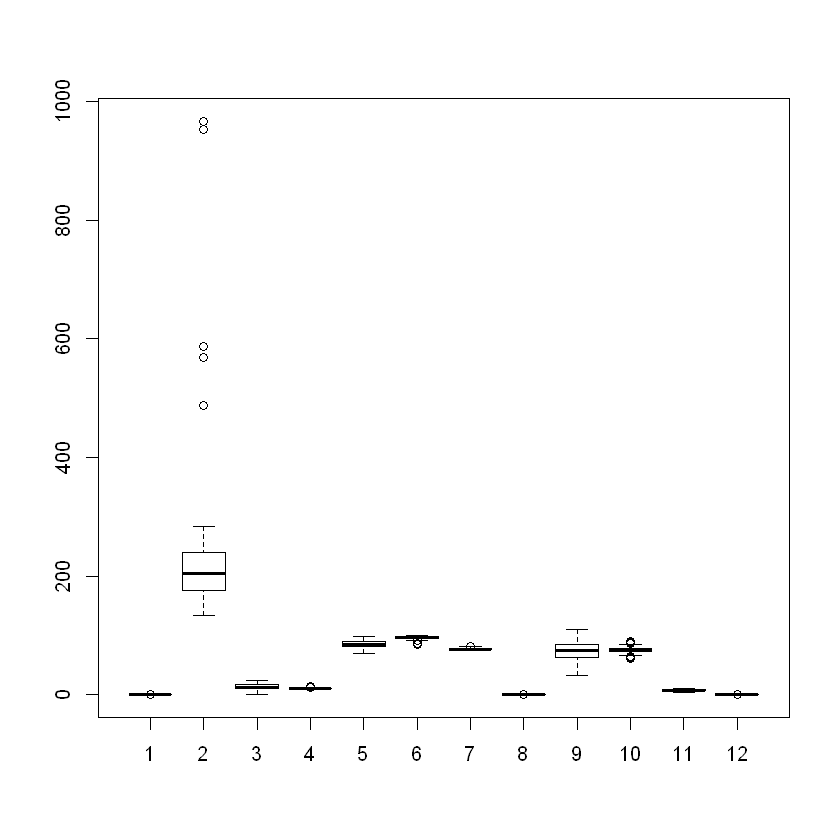

In [58]:
datos1 <- as.matrix(datosPobMayor100[1:48,3:13])
datos2 <- matrix(as.numeric(datos1),ncol=12,nrow=48,byrow=FALSE)

summary(datos2)
boxplot(datos2)

                                            Poblaci.n..miles..2011       IDSE
Poblaci.n..miles..2011                                  1.00000000  0.1190323
IDSE                                                    0.11903226  1.0000000
Ingreso.per.c.p..Mens..miles....2006.11                -0.02555617  0.9085457
Pobreza...2006.11                                      -0.11933041 -0.8616795
Escolaridad..aØos..2006.11                              0.11882194  0.9443015
Material.Vivienda.bueno.o.acceptable...2006             0.22034980  0.6774838
Alcantarillado.o.Fosa.S.pt....2006                      0.17217635  0.5896905
Esperanza.vida.al.nacer..aØos..2005.10                  0.33427186  0.5693870
X.ndice.Desarrollo.Humano                               0.17370493  0.9636479
Tasa.AVPP.x.1000.h.2007.11                             -0.36791738 -0.3559665
X..defunc..50..aØos.2011                               -0.13307719  0.4958827
Mortalidad.Infantil.x.1000.NV.2009.11                  -0.068783

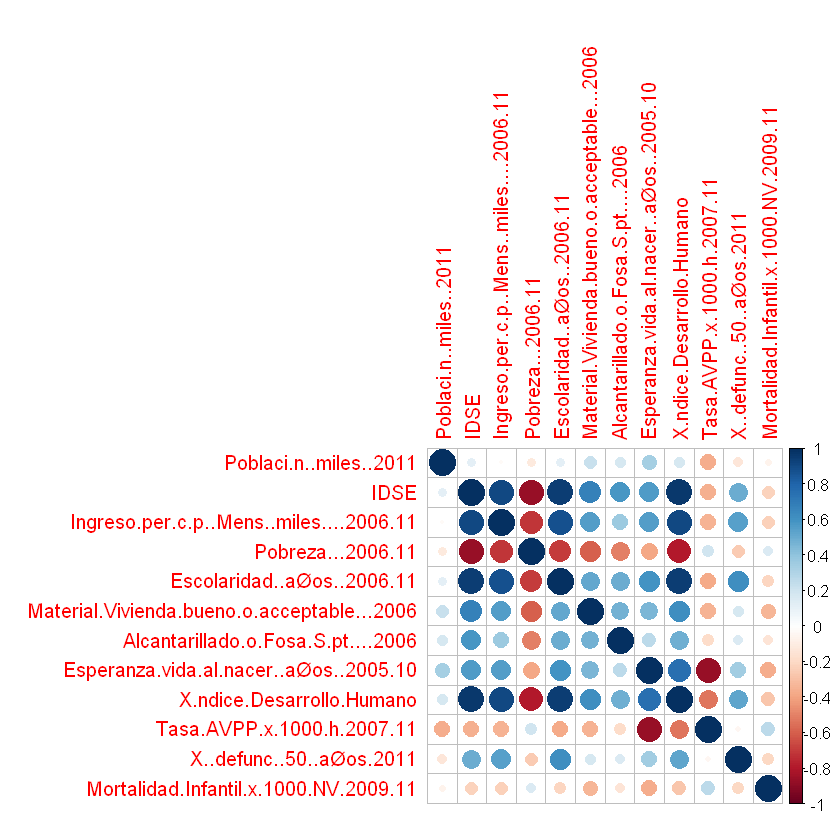

In [59]:
mcor<-cor(datosPobMayor100[,2:13])
print(mcor)

corrplot(mcor)

In [60]:
pca_res <- prcomp(datosPobMayor100[,2:13], scale = TRUE)
names(pca_res)
pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 2.5107692 1.2855756 1.0817061 0.9521958 0.8060285 0.7444670 0.6204505
 [8] 0.4550775 0.3000834 0.2763645 0.0644572 0.0043463

Poblaci.n..miles..2011 
                                207.9125000 
                                       IDSE 
                                  0.6750208 
    Ingreso.per.c.p..Mens..miles....2006.11 
                                252.5604167 
                          Pobreza...2006.11 
                                 13.3708333 
                 Escolaridad..aØos..2006.11 
                                 10.8125000 
Material.Vivienda.bueno.o.acceptable...2006 
                                 84.8875000 
         Alcantarillado.o.Fosa.S.pt....2006 
                                 96.1666667 
     Esperanza.vida.al.nacer..aØos..2005.10 
                                 77.6020833 
                  X.ndice.Desarrollo.Humano 
                                  0.6165208 
                 Tasa.AVPP.x.1000.h.2007.11 
                                 73.4708333 
                   X..defunc..50..aØos.2011 
                                 75.0458333 
      Mortalidad.Infantil.x.1000.NV.2009.11 
                                  7.6666667

Poblaci.n..miles..2011 
                               117.81162321 
                                       IDSE 
                                 0.09298009 
    Ingreso.per.c.p..Mens..miles....2006.11 
                               176.06251034 
                          Pobreza...2006.11 
                                 5.08527111 
                 Escolaridad..aØos..2006.11 
                                 1.19246303 
Material.Vivienda.bueno.o.acceptable...2006 
                                 6.25893829 
         Alcantarillado.o.Fosa.S.pt....2006 
                                 3.68408500 
     Esperanza.vida.al.nacer..aØos..2005.10 
                                 1.56334197 
                  X.ndice.Desarrollo.Humano 
                                 0.10226020 
                 Tasa.AVPP.x.1000.h.2007.11 
                                17.70843000 
                   X..defunc..50..aØos.2011 
                                 5.89308857 
      Mortalidad.Infantil.x.1000.NV.2009.11 
                                 1.50719315

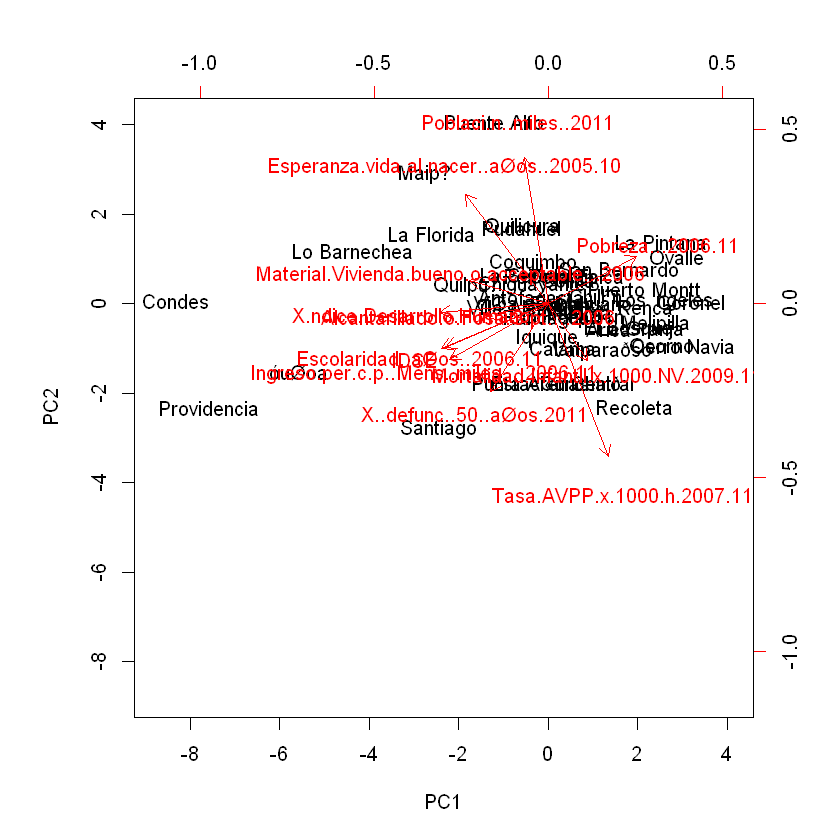

In [61]:
biplot(pca_res, scale = 0)

In [62]:
# 2
# En ciudades como Maipu, Quilicura, Pudahuel, la esperanza de vida al Nacer es correlativamente alta
# En ciudades como La Pintana, Ovalle, San Bernardo, Puerto Montt, tienen una correlación positiva con porcentaje de pobreza
# Las Condes tiene una correlación positiva de Indice de Desarrollo humano, Alcantarillado o fosa (agua potable), 
# y material de vivienda bueno
# Ciudad con correlación positiva en defunciones, Santiago
# Una gran cantidad de ciudades comparten correlaciones leves en el centro de las componentes principales
